In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('wine/winequality-red.csv')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# Display basic information and summary statistics
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


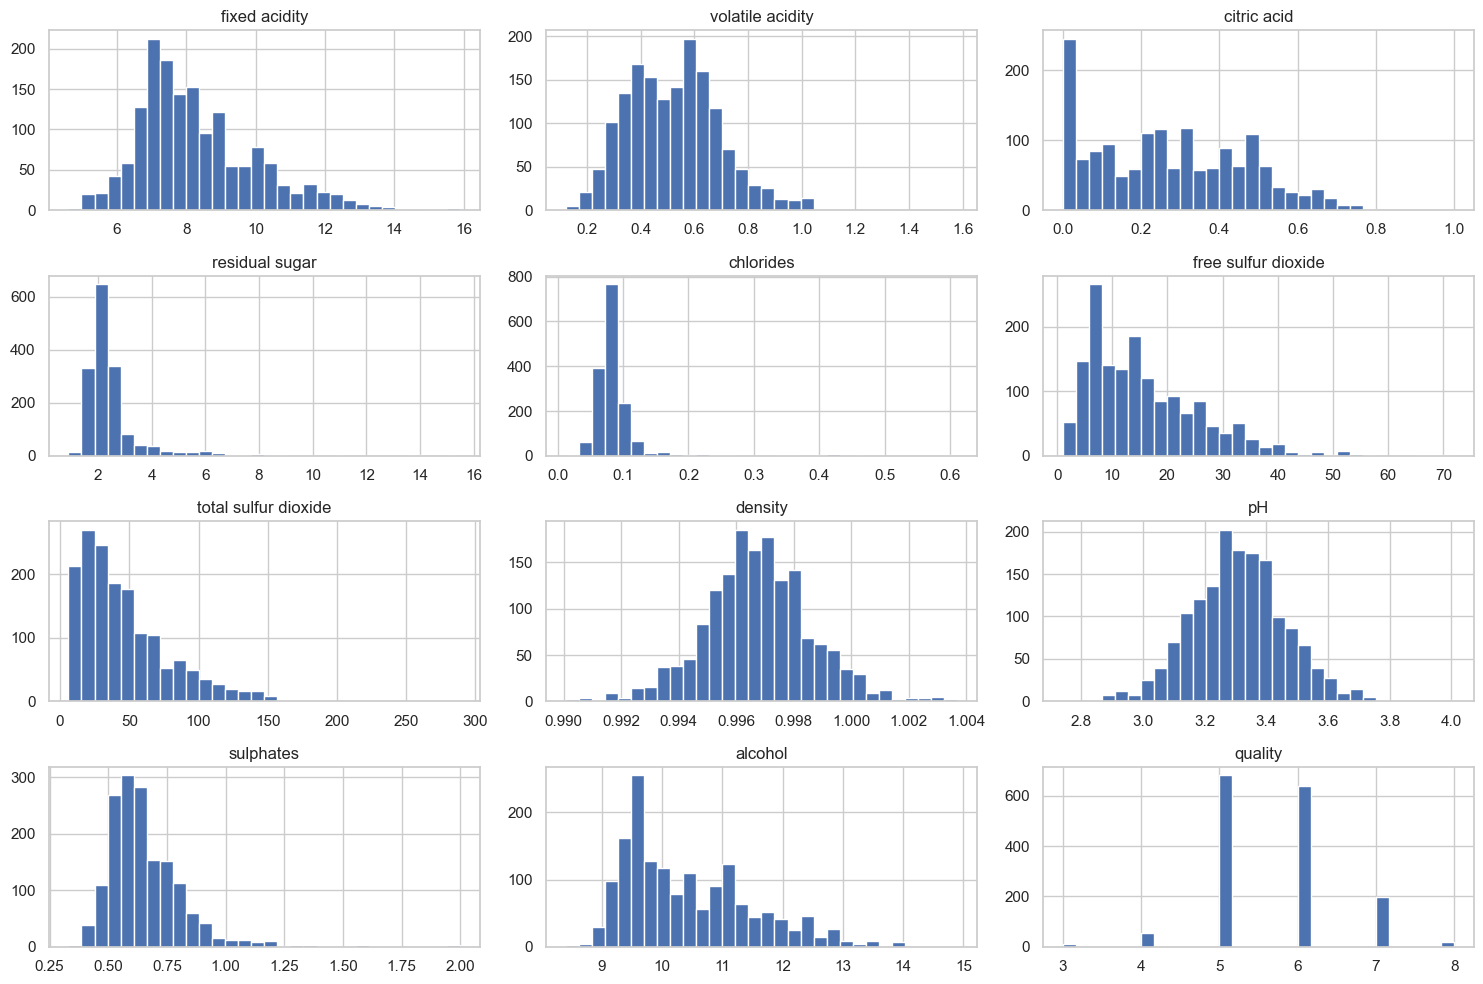

In [16]:
sns.set(style="whitegrid")

# Plot histograms for each feature
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

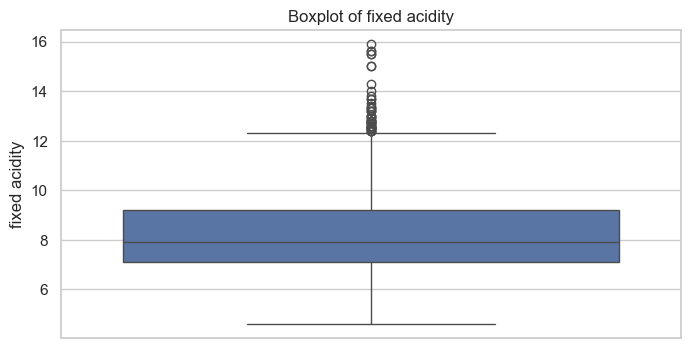

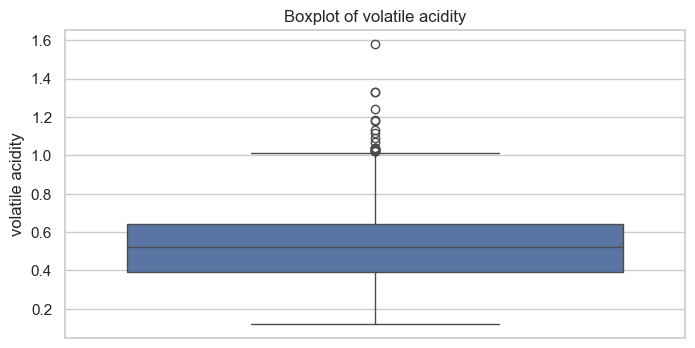

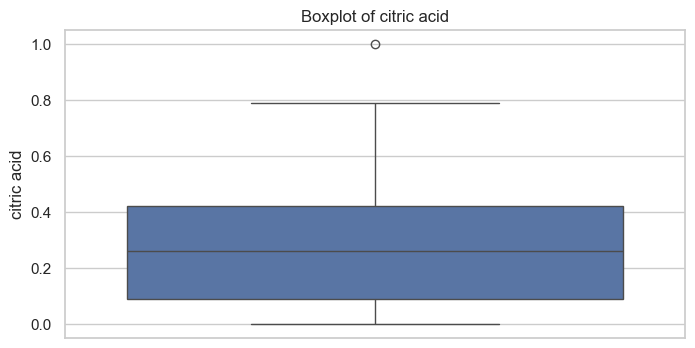

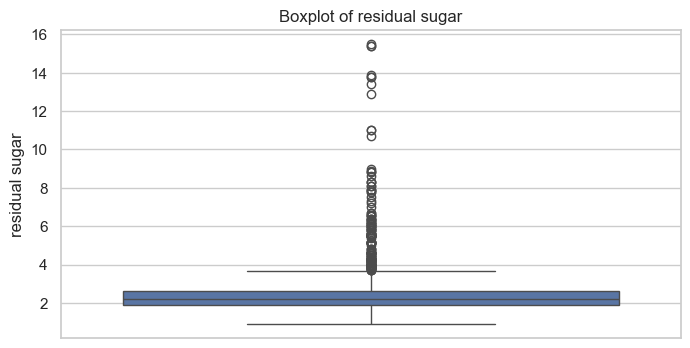

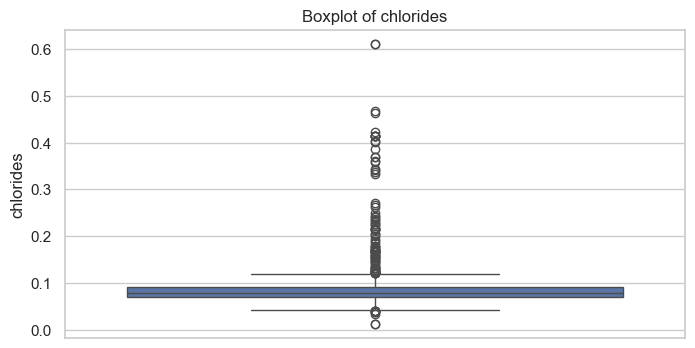

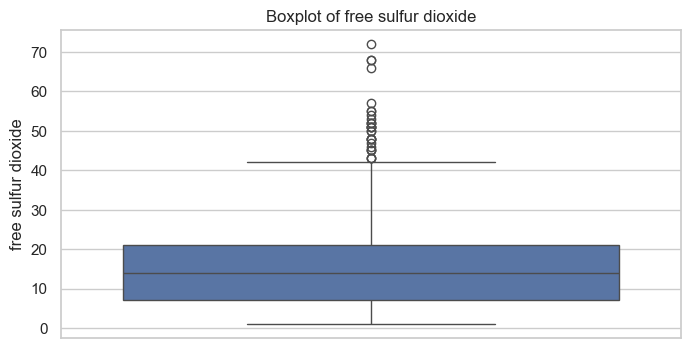

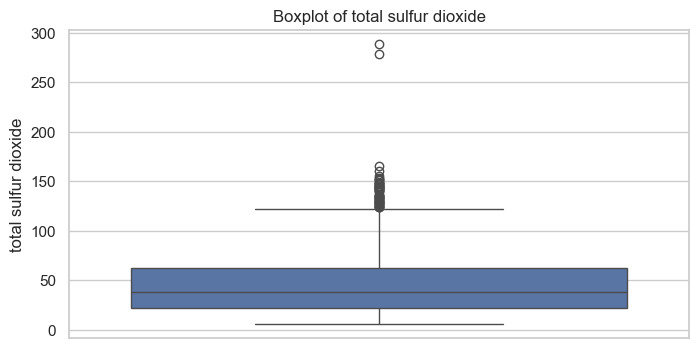

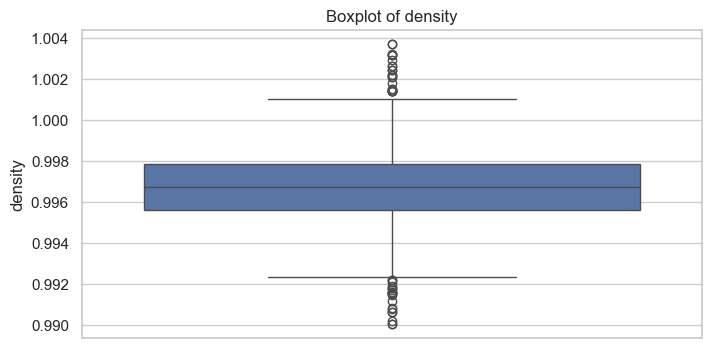

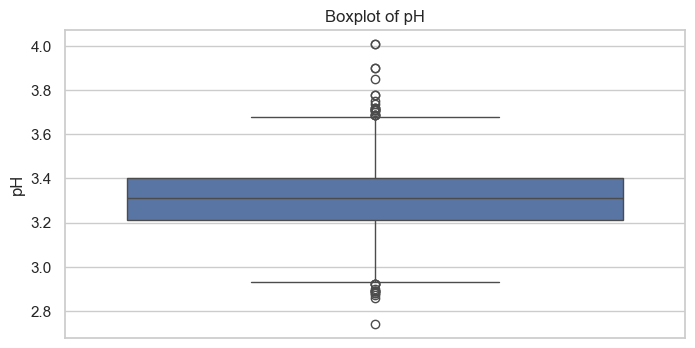

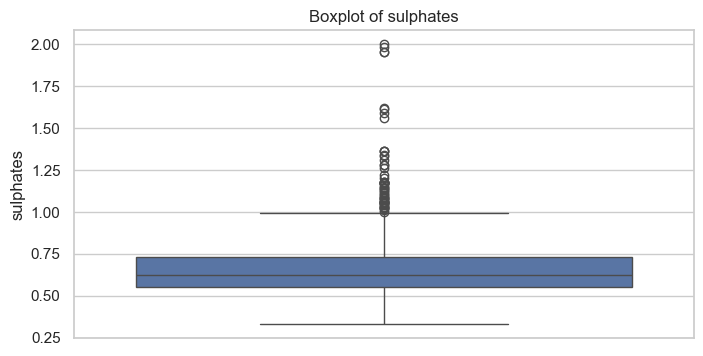

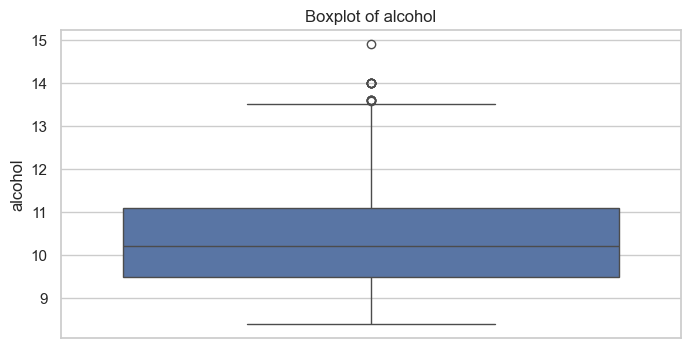

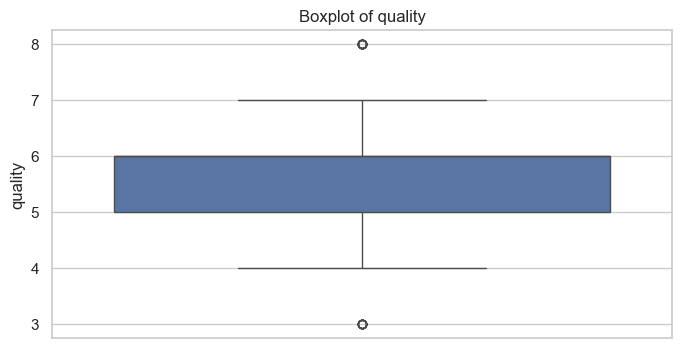

In [18]:
# Plot boxplots for each feature
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

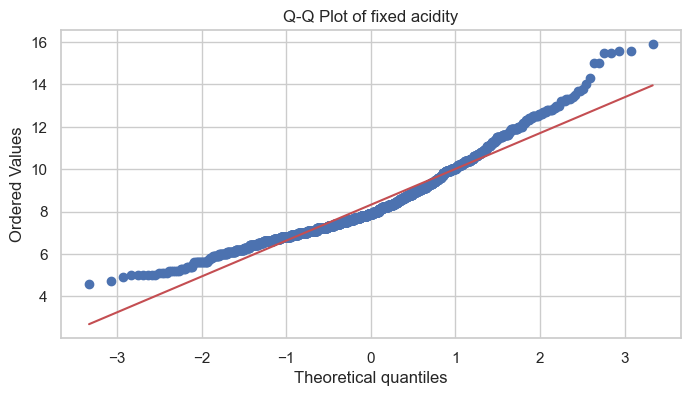

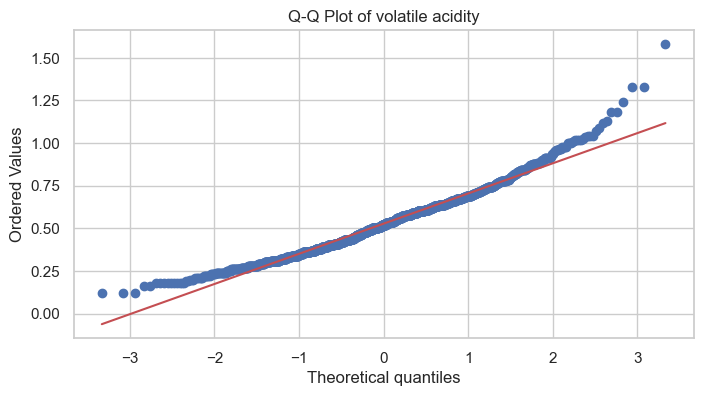

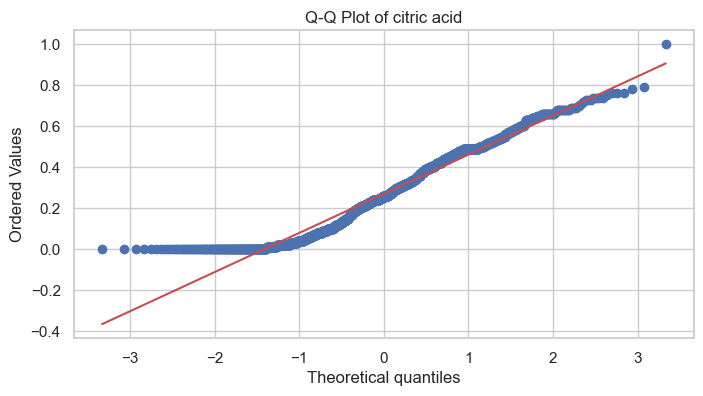

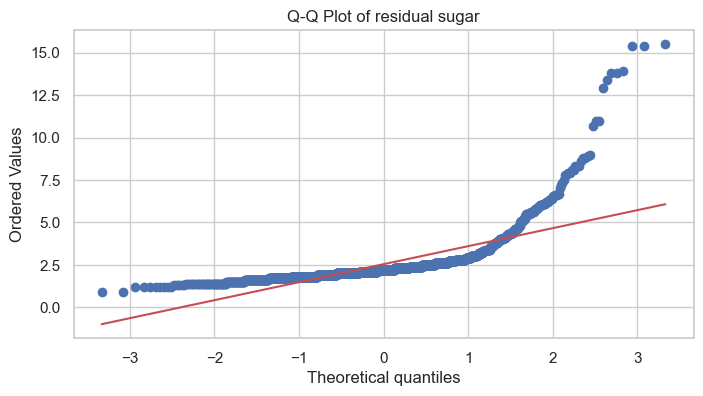

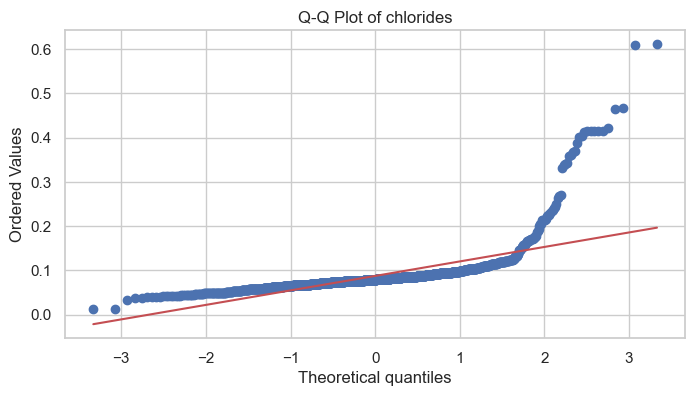

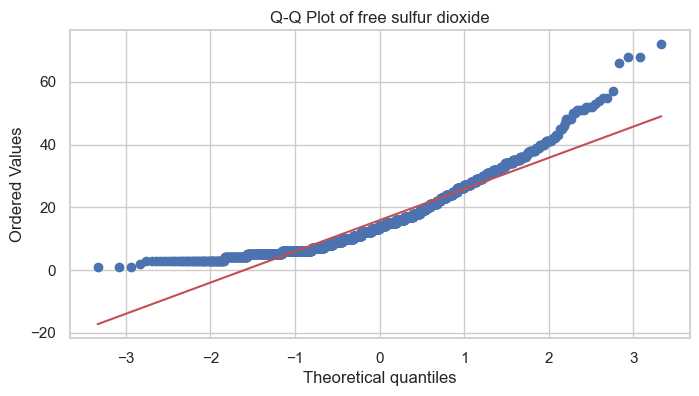

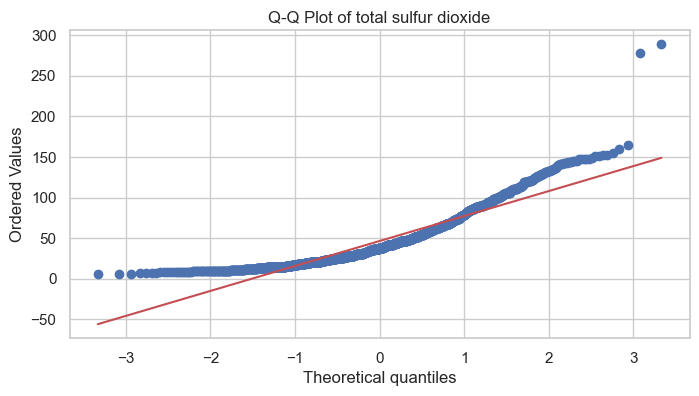

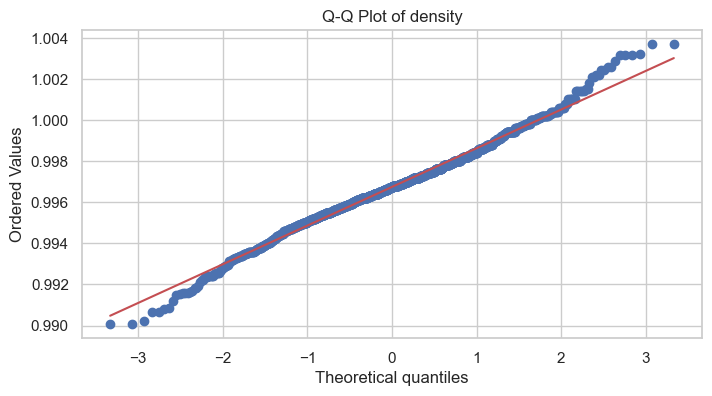

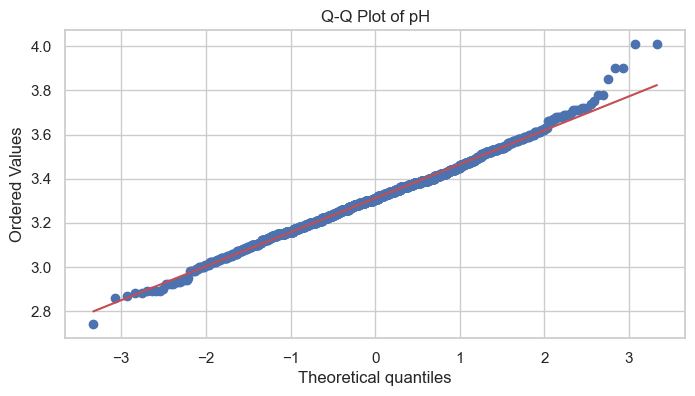

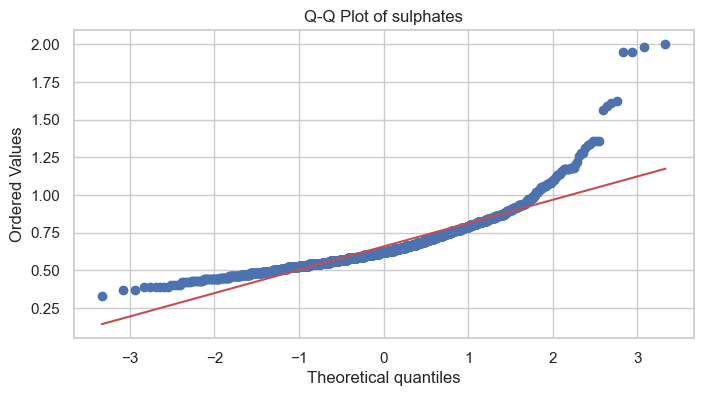

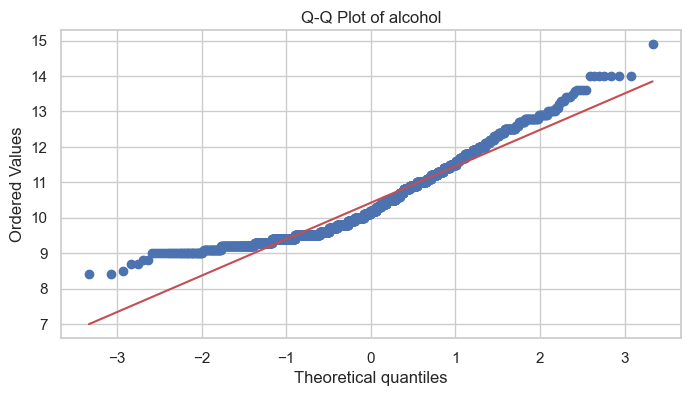

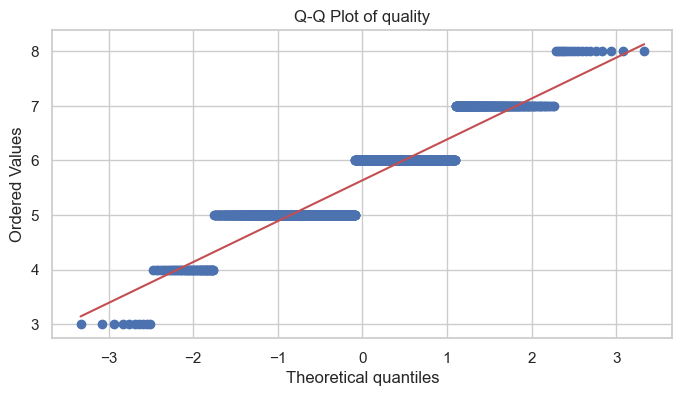

In [20]:
import scipy.stats as stats

# Q-Q plot for each feature
for column in df.columns:
    plt.figure(figsize=(8, 4))
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.show()



In [22]:
# Perform Shapiro-Wilk test for normality
for column in df.columns:
    stat, p = stats.shapiro(df[column].dropna())  # Drop NA values for the test
    print(f'{column}: Shapiro-Wilk Test Stat={stat:.3f}, p-value={p:.3f}')

fixed acidity: Shapiro-Wilk Test Stat=0.942, p-value=0.000
volatile acidity: Shapiro-Wilk Test Stat=0.974, p-value=0.000
citric acid: Shapiro-Wilk Test Stat=0.955, p-value=0.000
residual sugar: Shapiro-Wilk Test Stat=0.566, p-value=0.000
chlorides: Shapiro-Wilk Test Stat=0.484, p-value=0.000
free sulfur dioxide: Shapiro-Wilk Test Stat=0.902, p-value=0.000
total sulfur dioxide: Shapiro-Wilk Test Stat=0.873, p-value=0.000
density: Shapiro-Wilk Test Stat=0.991, p-value=0.000
pH: Shapiro-Wilk Test Stat=0.993, p-value=0.000
sulphates: Shapiro-Wilk Test Stat=0.833, p-value=0.000
alcohol: Shapiro-Wilk Test Stat=0.929, p-value=0.000
quality: Shapiro-Wilk Test Stat=0.858, p-value=0.000


In [30]:
def log_features(df):
    for i in df.columns:
        df[i].apply(lambda x: np.log(x + 1))
    return df



In [34]:
df['log_feature'] = df['alcohol'].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)


In [36]:
df['sqrt_feature'] = df['alcohol'].apply(lambda x: np.sqrt(x + 1))  # Adding 1 to avoid sqrt(0)


In [38]:
from scipy import stats

df['boxcox_feature'], _ = stats.boxcox(df['alcohol'] + 1)  # Adding 1 to avoid issues with zero values


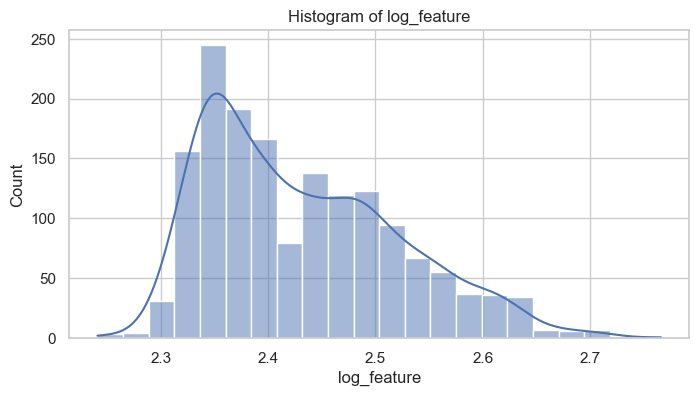

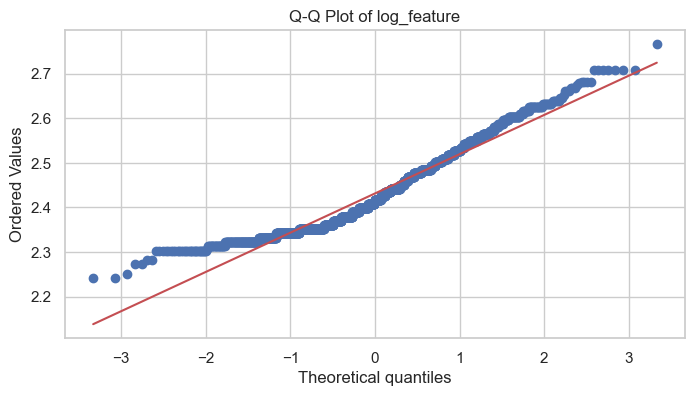

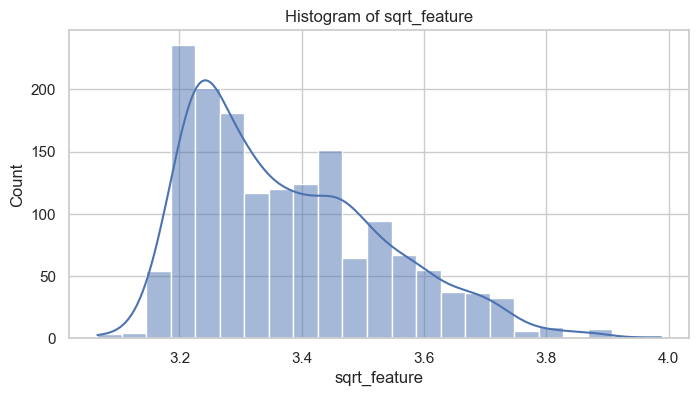

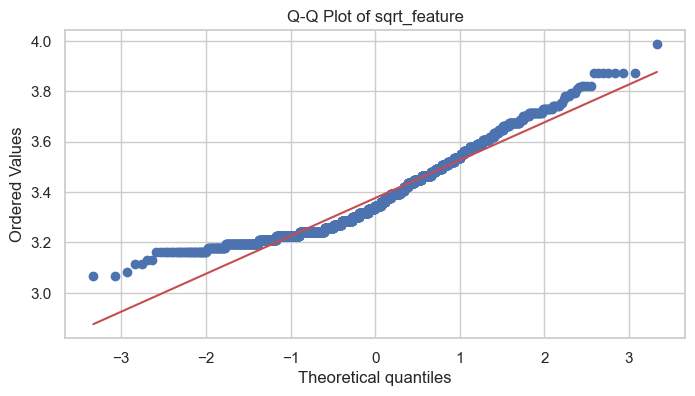

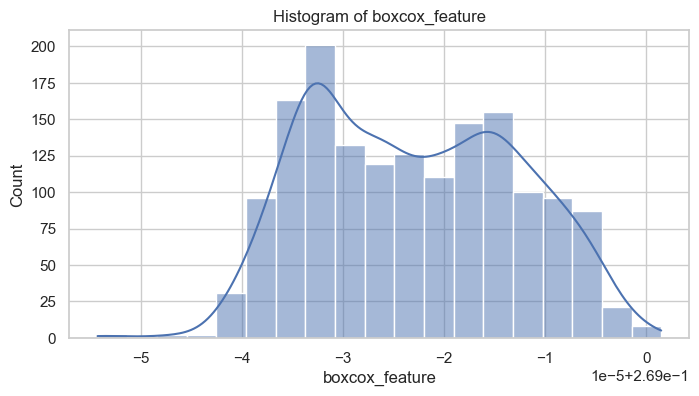

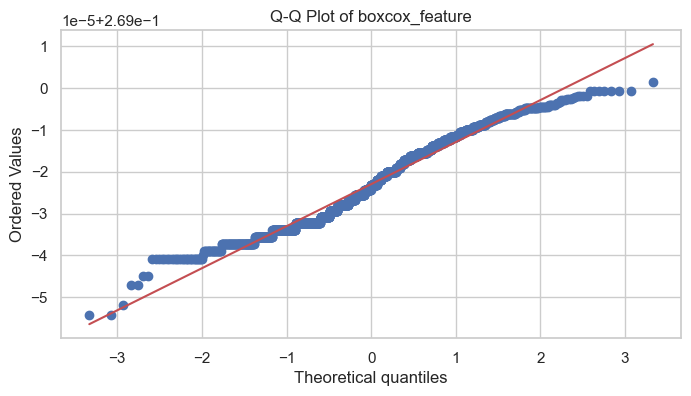

In [42]:
# Re-plot histograms and Q-Q plots for transformed features
for column in ['log_feature', 'sqrt_feature', 'boxcox_feature']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

    plt.figure(figsize=(8, 4))
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.show()


In [44]:
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=['quality'])  # Assuming 'quality' is the target variable
y=df['quality']
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

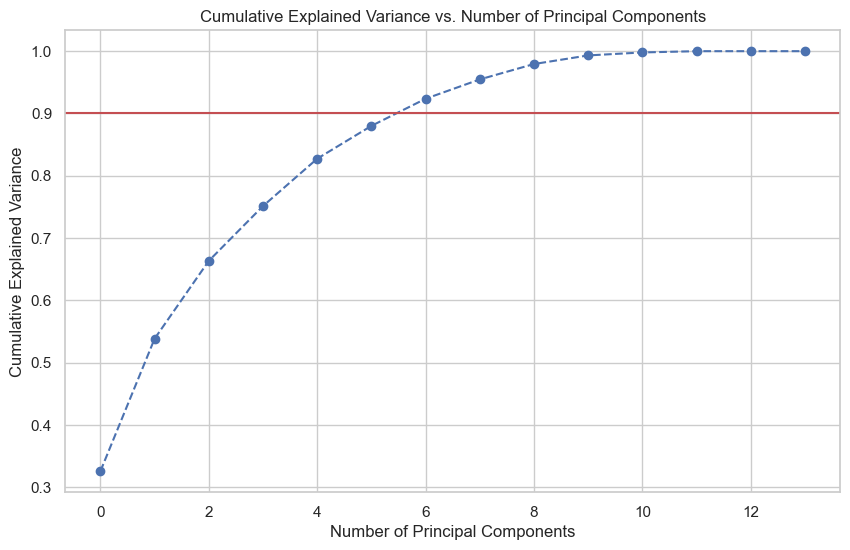

In [50]:
# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [52]:
import numpy as np

# Find the minimum number of components to explain 90% variance
num_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1
print(f'Minimum number of principal components required to explain 90% of the variance: {num_components}')


Minimum number of principal components required to explain 90% of the variance: 7
